## Dataset exploration of CEReD

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [8]:
# anonymized subset of czech diaries collected from the candidate student teachers.
diaries = pd.read_csv('./../reflection-classification/data/diaries/cs/diaries.tsv',sep='\t')
print(len(diaries))
diaries.head()

950


,id,person_id,subject,ordering,Q1,Q2,Q3,Q4,Q5,Q6,Q7,diary
0,0,1,český jazyk,1,1,1,1,1,1,1,1,Zatím jsem absolvovala náslechové hodiny v hod...
1,1,1,český jazyk,2,1,1,1,1,1,1,1,"Jsem ráda, že jsem si vybrala školu, kterou na..."
2,2,1,český jazyk,3,1,1,1,1,1,1,1,"Praxe už mám skoro za sebou. Je tolik věcí, na..."
3,3,2,český jazyk,1,1,1,2,2,1,2,1,První úkol a co napsat. Sedím pátý den na prax...
4,4,2,český jazyk,2,1,1,2,2,1,2,1,Čtrnáct dní uteklo jako voda a já sedím a přem...


In [9]:
# load the datasets of the sentences, train, val, test sets
# in English
sentences_en_tr = pd.read_csv('./../reflection-classification/data/sentences/en/train/sentences.tsv',sep='\t')
sentences_en_val = pd.read_csv('./../reflection-classification/data/sentences/en/val/sentences.tsv',sep='\t')
sentences_en_te = pd.read_csv('./../reflection-classification/data/sentences/en/test/sentences.tsv',sep='\t')
print(f'In English\nLenght training set : {len(sentences_en_tr)}')
print(f'Lenght validation set : {len(sentences_en_val)}')
print(f'Lenght testing set : {len(sentences_en_te)}')

# in Czech
sentences_cs_tr = pd.read_csv('./../reflection-classification/data/sentences/cs/train/sentences.tsv',sep='\t')
sentences_cs_val = pd.read_csv('./../reflection-classification/data/sentences/cs/val/sentences.tsv',sep='\t')
sentences_cs_te = pd.read_csv('./../reflection-classification/data/sentences/cs/test/sentences.tsv',sep='\t')
print(f'\nIn Czech\nLenght training set : {len(sentences_cs_tr)}')
print(f'Lenght validation set : {len(sentences_cs_val)}')
print(f'Lenght testing set : {len(sentences_cs_te)}')
sentences_en_tr.head()


In English
Lenght training set : 6096
Lenght validation set : 339
Lenght testing set : 339

In Czech
Lenght training set : 6096
Lenght validation set : 339
Lenght testing set : 339


,idx,context,sentence,y,confidence,y_requires_context
0,1907,I have to explain to some why I gave them such...,"Unfortunately, I won't have time to get around...",Experience,"[5, 4]",NaN
1,4486,I warn them of mistakes. They read in front of...,"What I liked: They worked, even though they we...",Feeling,"[5, 2]",NaN
2,6544,When I ask MiÅ¡a that maybe all three are work...,Another situation occurred when I asked MÃ­Å¡a...,Experience,"[3, 5]",NaN
3,5966,Pupils reported a lot and enjoyed reading and ...,So far there has been no problem.,Experience,"[4, 4]",NaN
4,6218,"First, I divided the children into groups usin...",The children were given a task in groups and t...,Other,"[6, 6]",NaN


## Exploratory analysis of the English dataset

plot distrib for each train/val/test of:
- nb of words in context
- nb of words in sentence
- y
- confidence (maybe remix the matching pairs like [2,5] and [5,2])
- y_requires_context

In [10]:
def split_sets(set):
    if set == 'tr':
        data = sentences_en_tr
    elif set == 'val':
        data = sentences_en_val
    else:
        data = sentences_en_te
    return data

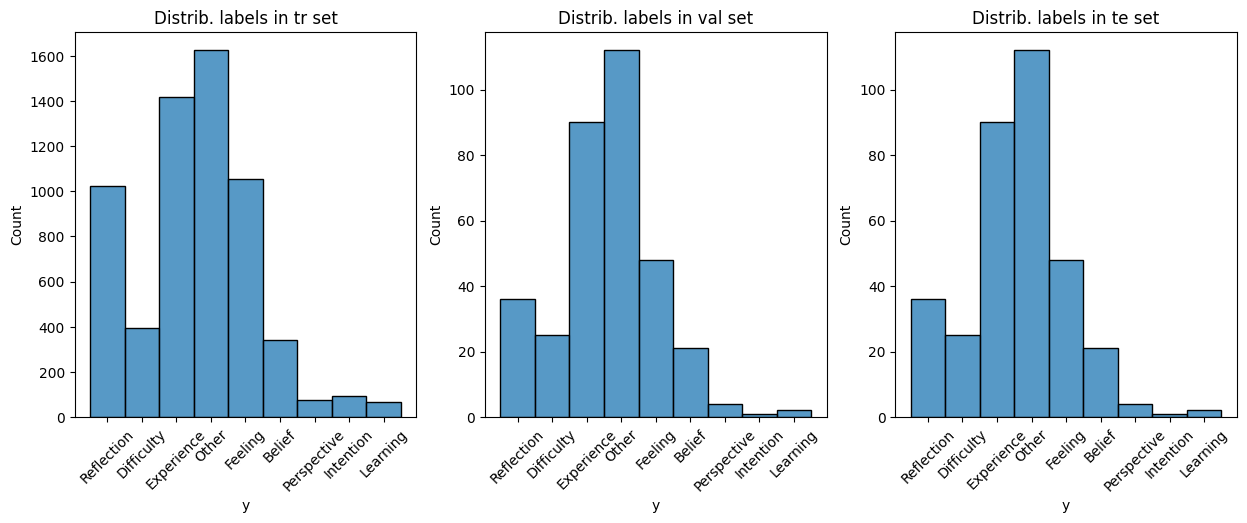

In [11]:
# distribution of labels

# Applying custom categorical order to training set
M_catType = CategoricalDtype(categories = ['Reflection', 'Difficulty', 'Experience', 'Other', 'Feeling', 'Belief', 'Perspective', 'Intention', 'Learning'], ordered = True)

fig, axs = plt.subplots(1,3, figsize = (15,5))
for i, split in enumerate(['tr', 'val', 'te']):
    df = split_sets(split)
    df['y'] = df['y'].astype(M_catType)
    sns.histplot(df['y'], ax = axs[i])
    axs[i].set_title(f'Distrib. labels in {str(split)} set')
    axs[i].tick_params(axis='x',labelrotation = 45)
plt.show()

Mean # words in context for tr, val, te sets : [63.582, 64.186, 64.186]


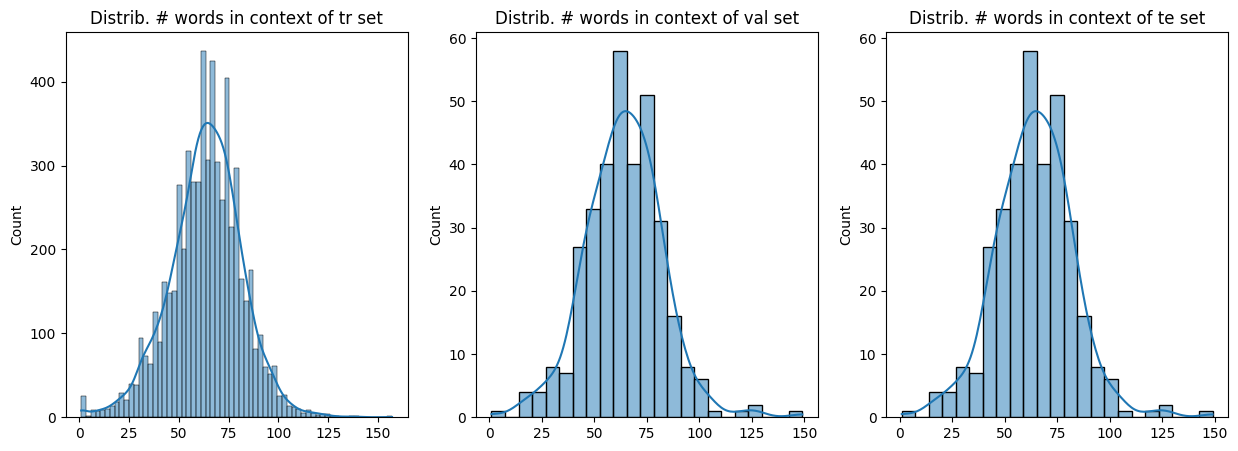

In [12]:
# distributions number of words in context
fig, axs = plt.subplots(1,3, figsize = (15,5))
mean = []
for i, split in enumerate(['tr', 'val', 'te']):
    df = split_sets(split)
    sns.histplot([len(str(sentence).split()) for sentence in df['context']], ax = axs[i], kde = True)
    mean.append(np.mean([len(str(sentence).split()) for sentence in df['context']]).round(3))
    #axs[i].vlines(np.mean([len(str(sentence).split()) for sentence in df['context']]), ymin = 0, ymax = 100, color = 'r', label = 'mean')
    axs[i].set_title(f'Distrib. # words in context of {str(split)} set')
    #axs[i].legend()
print(f'Mean # words in context for tr, val, te sets : {mean}')
plt.show()

Mean # words in sentence for tr, val, te sets : [19.401, 20.012, 20.012]


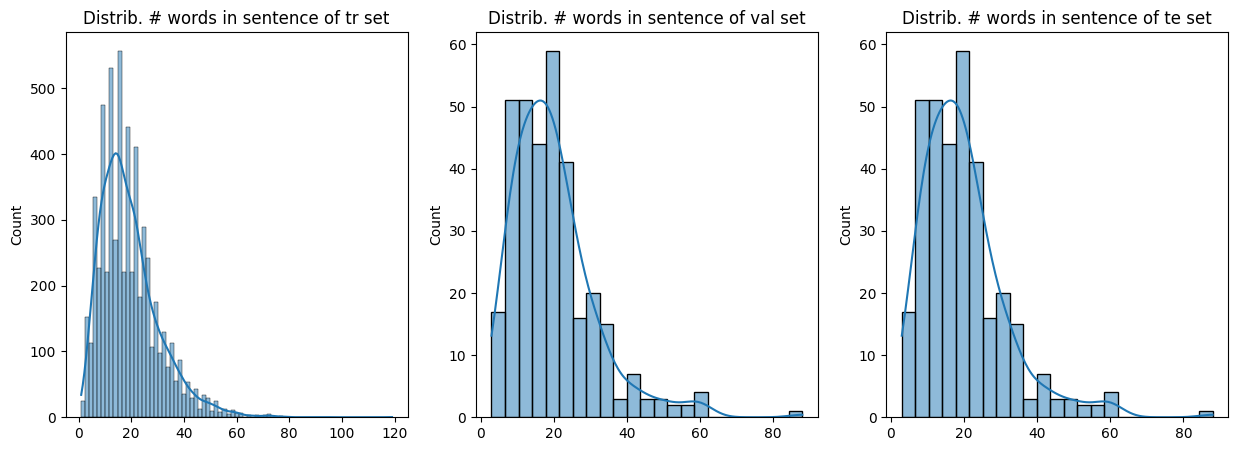

In [13]:
# distributions number of words in sentence
fig, axs = plt.subplots(1,3, figsize = (15,5))
mean = []
for i, split in enumerate(['tr', 'val', 'te']):
    df = split_sets(split)
    sns.histplot([len(str(sentence).split()) for sentence in df['sentence']], ax = axs[i], kde = True)
    mean.append(np.mean([len(str(sentence).split()) for sentence in df['sentence']]).round(3))
    axs[i].set_title(f'Distrib. # words in sentence of {str(split)} set')
print(f'Mean # words in sentence for tr, val, te sets : {mean}')
plt.show()

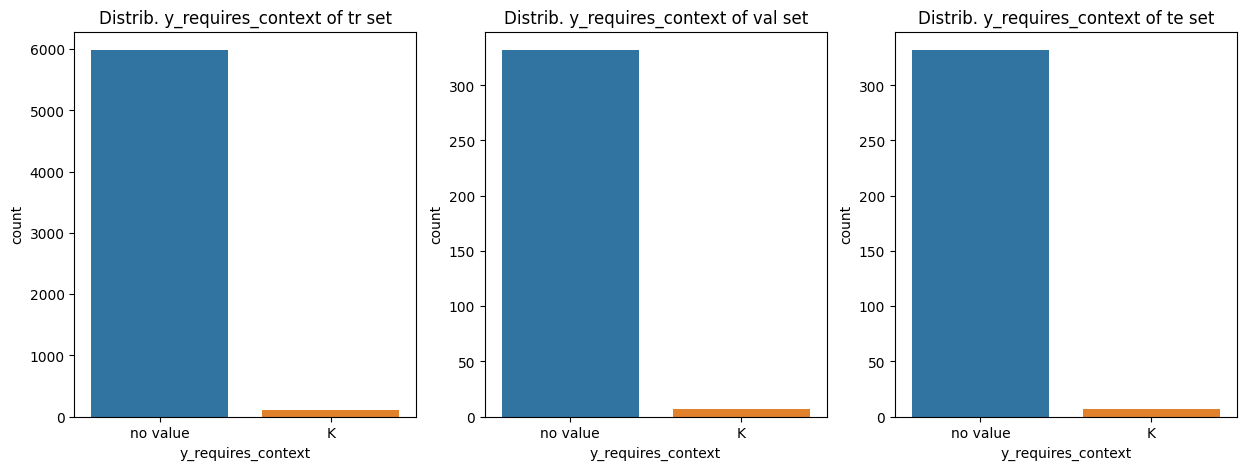

In [14]:
# distributions of y_requires_context
fig, axs = plt.subplots(1,3, figsize = (15,5))
for i, split in enumerate(['tr', 'val', 'te']):
    df_copy = split_sets(split).copy()
    df_copy['y_requires_context'].replace({np.nan : 'no value'}, inplace=True)
    sns.countplot(data = df_copy, x = 'y_requires_context', ax=axs[i])
    axs[i].set_title(f'Distrib. y_requires_context of {str(split)} set')
plt.show()

In [15]:
print(len(sentences_en_tr['confidence'].unique()))
print(sentences_en_tr['confidence'].unique())

53
['[5, 4]' '[5, 2]' '[3, 5]' '[4, 4]' '[6, 6]' '[5, 5]' '[6, 7]' '[4, 6]'
 '[6, 5]' '[6, 4]' '[5, 3]' '[3, 1]' '[3, 3]' '[2, 4]' '[3, 2]' '[3, 4]'
 '[6, 3]' '[4, 5]' '[2, 6]' '[5]' '[3, 6]' '[4, 3]' '[5, 7]' '[5, 6]'
 '[4, 7]' '[7, 6]' '[2, 2]' '[2, 5]' '[1, 4]' '[4, 2]' '[7, 4]' '[2, 3]'
 '[7, 5]' '[6, 2]' '[3, 7]' '[3]' '[1, 3]' '[5, 1]' '[4]' '[2, 1]'
 '[1, 2]' '[1, 6]' '[1, 1]' '[7, 2]' '[6, 1]' '[1, 5]' '[7, 7]' '[7]'
 '[4, 1]' '[2]' '[1]' '[7, 3]' '[6]']


In [16]:
df_test = sentences_en_tr.copy()
#print(len(df_test['confidence'].unique()))
new_pairs = []
for pair in df_test['confidence'].unique()[0]:
    print(pair[0])
    print(type(pair))

[
<class 'str'>
5
<class 'str'>
,
<class 'str'>
 
<class 'str'>
4
<class 'str'>
]
<class 'str'>


## Exploratory analysis of the diaries dataset

In [17]:
diaries.head()

,id,person_id,subject,ordering,Q1,Q2,Q3,Q4,Q5,Q6,Q7,diary
0,0,1,český jazyk,1,1,1,1,1,1,1,1,Zatím jsem absolvovala náslechové hodiny v hod...
1,1,1,český jazyk,2,1,1,1,1,1,1,1,"Jsem ráda, že jsem si vybrala školu, kterou na..."
2,2,1,český jazyk,3,1,1,1,1,1,1,1,"Praxe už mám skoro za sebou. Je tolik věcí, na..."
3,3,2,český jazyk,1,1,1,2,2,1,2,1,První úkol a co napsat. Sedím pátý den na prax...
4,4,2,český jazyk,2,1,1,2,2,1,2,1,Čtrnáct dní uteklo jako voda a já sedím a přem...


In [18]:
print(f'There are {len(diaries)} reviews for the diaries of {len(diaries["person_id"].unique())} persons concerning {len(diaries["subject"].unique())} subjects.')

# check if their is NaN values
print(f'There are {len(diaries) - len(diaries.dropna())} lines with a NaN value.')

There are 950 reviews for the diaries of 238 persons concerning 17 subjects.
There are 0 lines with a NaN value.


mean = 474.325


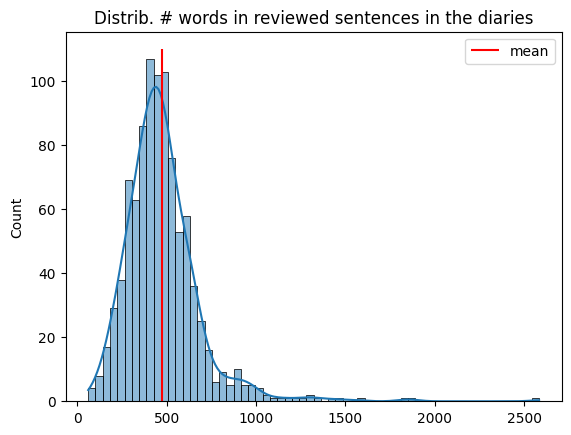

In [19]:
sns.histplot([len(str(sentence).split()) for sentence in diaries['diary']], kde = True)
print(f'mean = {np.mean([len(str(sentence).split()) for sentence in diaries["diary"]]).round(3)}')
plt.vlines(np.mean([len(str(sentence).split()) for sentence in diaries['diary']]).round(3), ymin = 0, ymax = 110, color = 'r', label = 'mean')
plt.title(f'Distrib. # words in reviewed sentences in the diaries')
plt.legend()
plt.show()

In [20]:
print(diaries['Q4'].unique())

[ 1  2  4 -1  3  6]


In [21]:
# create data
#df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                #['D', 10, 29, 13, 19]],
                #columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
df = diaries[['Q1','Q2','Q3','Q4','Q5','Q6','Q7']]

# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

KeyError: 'Team'